In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

In [17]:
# -*- coding: utf-8 -*-
"""
@author: VerónicaChamorroAlva
"""
import pymongo 
import pandas as pd
import json
import os
from os import listdir
from os.path import isfile, join
from pandas.io.json import json_normalize
import time
from math import log
import nltk
nltk.download("stopwords")
from pprint import pprint
from os import listdir
from os.path import isfile, join
from pandas.io.json import json_normalize

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
spanish_stemmer = SnowballStemmer('spanish')
import re


def review_to_wordlist( review, remove_stopwords=True, stemmer=True):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
   # review_text = review.replace("@",'')
    #review_text = re.sub(r'[^\w\s]|\d','',review)  
    
   # review = review.lower().split() 
   
   
    #pprint(review)
    review_text=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', review) #quita links
   
    review_text1 = re.sub(r'[^\w\s]','',review_text)   #quita caracteres especiales
    #pprint(review_text1)
    words = review_text1.lower().split() 
 #   wordcloud = review_text.lower().split()

    if remove_stopwords:
        stops = set(stopwords.words("spanish"))
        stops = list(stops) + ['https', 'co','si']
        #stops = list(stops)
       # print(stops)
        words = [w for w in words if not w in stops]
      
    if stemmer:
        b = []
        stemmer = spanish_stemmer
        for word in words:
            b.append(stemmer.stem(word))
    else:
        b = words
    # 5. Return a list of words
    
    return(b)

def open_conection():
    client = pymongo.MongoClient('localhost',27017)
    return client

client = open_conection()
db = client.twitter
col = db.cam2017Entr

print(col.count())

print ('inicio:', time.strftime('%H:%M:%S'))
#cursor = col.find({'text': "*/tráfico/*"},{ 'text': 1, '_id': 1 }) 
cursor = col.find({'text':{"$regex": "tráfico"}},{ 'text': 1, '_id': 1 })
l = list(cursor)
tabla = pd.DataFrame(l)
print ('fin:', time.strftime('%H:%M:%S'))

res = tabla[['_id', 'text']]
#print (res)

tabla1 = pd.DataFrame(res)
tabla1['words'] = tabla1.text.apply(review_to_wordlist)
tabla1
#print (tabla1.head)
#print (type(tabla1))
keyw={}
for e in tabla1.words:
    for i in e:
        if i in keyw:
            keyw[i]=keyw[i]+1
        else:
            keyw[i]=1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VerónicaChamorroAlva\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!
351665
inicio: 15:45:30
fin: 15:45:31


In [18]:
cursorCont = col.find({'text':{"$regex": "contaminación"}},{ 'text': 1, '_id': 1 })
l = list(cursorCont)
tablaCont = pd.DataFrame(l)
print ('fin:', time.strftime('%H:%M:%S'))

resCont = tablaCont[['_id', 'text']]
#print (res)

tablaCont = pd.DataFrame(resCont)
tablaCont['words'] = tablaCont.text.apply(review_to_wordlist)
tablaCont
#print (tabla1.head)
#print (type(tabla1))
keyw={}
for e in tablaCont.words:
    for i in e:
        if i in keyw:
            keyw[i]=keyw[i]+1
        else:
            keyw[i]=1


fin: 15:45:31


In [19]:
dpeso=[]
dpesoWords={}

totalK=len(keyw)
total=0
for k,v in keyw.items():
   # print(v/totalK)
    if(v>10):
        total=total+1
        
for k,v in keyw.items():
   # print(v/totalK)
    if(v>10):
        dpeso.append((k,log(v/total,10)))
    
    #dpesoWords[k]={k,v,log(v/totalK)}

#print (dpesoWords)
pprint (len(dpeso))
#pprint(totalK)
#print ('final2:', time.strftime('%H:%M:%S'))

0


In [20]:
tabla1.head()
tablaCont.head()

,_id,text,words
0,722416620891537408,Stigmabase | ES - Hay una contaminación relig...,"[stigmab, contamin, religi, congres, german, r..."
1,722432200767971329,#Egaylity - Hay una contaminación religiosa e...,"[egaylity, contamin, religi, congres, german, ..."
2,723470951548108800,"Es sexo ecológico, sin contaminación acústica.","[sex, ecolog, contamin, acust]"
3,724252558156533761,La contaminación paralisa la Biodiversidad,"[contamin, paralis, biodivers]"
4,724615602569121792,Diputado australiano prende fuego a un río par...,"[diput, australian, prend, fueg, rio, demostr,..."


In [67]:
def create_vector( wordsS):
    d_vector=[]
    encontrado=False
    for w in dpeso:
        for t in wordsS:
            if t==w[0]:
                encontrado= True
                continue
        if encontrado:
            #d_vector.append(w[1])
            d_vector.append(1)
        else:
            d_vector.append(0)
        
            
    print (d_vector)
    return(d_vector)


In [68]:
tabla1['vector'] = tabla1.words.apply(create_vector)
tablaCont['vector'] = tabla1.words.apply(create_vector)

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [69]:
print(len(tabla1))

44


In [73]:
lista_array1=[]
for t in tabla1["vector"]:
    lista_array1.append(t)
    
for t in tablaCont["vector"]:
    lista_array1.append(t)
    
X = np.array(lista_array1)

p=[]
print(len(X))


59


In [76]:
totalTrafico=len(tabla1)
totalContaminacion=len(tablaCont)
#print(len(lista_array))
for e in range(totalTrafico):
    p.append(1)

for e in range(totalContaminacion):
    p.append(2)

print(len(p))
y =  np.array(p)


118


In [77]:
clf = svm.SVC(kernel='linear', C = 1.0)
print (X.shape) # (5,4)
print (y.shape) # (5,)


(59, 1)
(118,)


In [78]:
#clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X,y)

#clf.fit(X[:-test_size],y[:-test_size])

ValueError: Found input variables with inconsistent numbers of samples: [59, 118]

In [44]:
client = open_conection()
db = client.twitter
col = db.cam2017Entr
mongo_id=722247433049083904

db.cam2017Entr.update_one({
  '_id': p['_id']
},{
  '$inc': {
    'd.a': 1
  }
}, upsert=False)


TypeError: list indices must be integers or slices, not str

In [ ]:
clas=clf.predict([1,0.5,0.4,1])

client = open_conection()
db = client.twitter
col = db.cam2017Entr

post = mycollection.find_one({"_id":mongo_id}) 
post['newfield'] = "abc"
mycollection.save(post)

result = cam2017Entr.insert_one(clasificacion)
clasificacion = cam2017Entr.find_one({'_id': result.inserted_id)

if clasificacion is not None:
                                      
    clasificacion['clasificacion'] =class
    mycollection.save(clasificacion)


In [37]:
clf.fit(X,y)

ValueError: The number of classes has to be greater than one; got 1

In [92]:
print(clf.predict([1,0.5,0.4,1]))

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [11]:
print(clf.predict([0.58,10.76]))

[1]


C:\Users\VerónicaChamorroAlva\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[-0.1380943  -0.24462418]


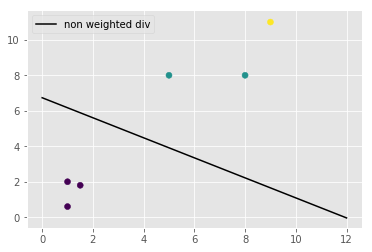

In [10]:
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()

In [22]:
import re

palabras = ['careta', 'carpeta', 'colita', 'cateta', 'cocreta', 'caleta', 'caseta']
for termino in palabras:
    if re.match('ca(...)ta', termino):
        print(termino)  # careta , carpeta, cateta, caleta, caseta 

carpeta


In [28]:
palabras = ['https://prueba.com', 'http://sdjdsjkkjsd.ooscmms', 'otra1', 'otra2']
for termino in palabras:
    if re.match('htt[0-5a-z]', termino):  # nº de 0 a 5 y letra de a a z
        print(termino) 

https://prueba.com
http://sdjdsjkkjsd.ooscmms


In [38]:
text = 'Los Madriles desde el Templo de Debod... No todo son edificios, tráfico, multas de la ORA...… https://t.co/9TRGncqhiX '
prueba1=re.sub(r'[^\w\s]','',text)   #solo palabras 
print(prueba1)
prueba2=re.sub(r'(htt[a-z]\s)', 'you', prueba1)
print(prueba2)

Los Madriles desde el Templo de Debod No todo son edificios tráfico multas de la ORA httpstco9TRGncqhiX 
Los Madriles desde el Templo de Debod No todo son edificios tráfico multas de la ORA httpstco9TRGncqhiX 


In [49]:
re.sub(r'[\s\w]Tem[\w\s]', ' & ', text, flags=re.IGNORECASE)

'Los Madriles desde el & lo de Debod... No todo son edificios, tráfico, multas de la ORA...… https://t.co/9TRGncqhiX '

In [58]:
URLless_string = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
print (URLless_string)

Los Madriles desde el Templo de Debod... No todo son edificios, tráfico, multas de la ORA...…  
